<a href="https://colab.research.google.com/github/the-redlord/comp455/blob/master/Project/Copy_of_cifar10model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: import

import keras
import numpy as np


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import  Conv2D, MaxPooling2D


#Now the dataset
from keras.datasets import cifar10


In [2]:
#Load the dataset
(X_Train, Y_Train),(X_Test, Y_Test) = cifar10.load_data()

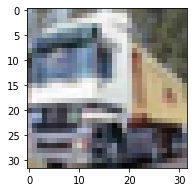

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(330+1+1)
plt.imshow(X_Train[1])
plt.show()

In [4]:
#Step 2: Data pre-processiing 


#Normalize the dataset
X_Train = X_Train.astype('float32')
X_Test = X_Test.astype('float32')

X_Train = X_Train/255.0
X_Test= X_Test/255.0

In [5]:
X_Train.shape

(50000, 32, 32, 3)

In [6]:
#Now one hot encoding on Y_Test

#convert vectors into Binary class matrices

Y_Train=keras.utils.to_categorical(Y_Train)
Y_Test=keras.utils.to_categorical(Y_Test)

In [7]:
cifar_classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

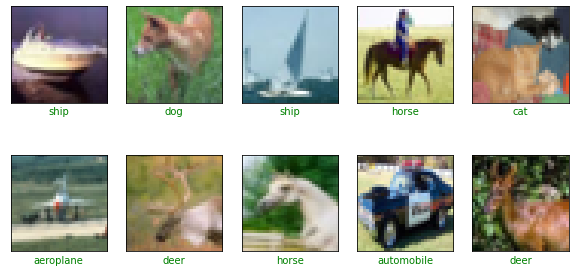

In [8]:
def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]),10,replace=False)
  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])

    # show correct prediction in green and wrong in red
    col ='green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(cifar_classes[np.argmax(p[i])],color=col)
  plt.show()

show_random_examples(X_Train,Y_Train,Y_Train)

In [9]:
#CHeck the shape of Y_Train
num_classes = Y_Train.shape[1]

In [10]:
#Step 3: Model Creation

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), padding = 'same', activation='relu',
          kernel_constraint = maxnorm(3)))

model.add(Dropout(0.2))
model.add(Conv2D (32, (3, 3) , activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation= 'softmax'))

#Configure the optimizer

sgd = SGD (learning_rate=0.01, momentum=0.9, decay= (0.01/25), nesterov = False)

#compile the model

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [12]:
model.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7131 - accuracy: 0.3784 - val_loss: 1.4347 - val_accuracy: 0.4906
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3441 - accuracy: 0.5153 - val_loss: 1.2129 - val_accuracy: 0.5678
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1662 - accuracy: 0.5847 - val_loss: 1.1179 - val_accuracy: 0.6008
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0472 - accuracy: 0.6286 - val_loss: 1.0139 - val_accuracy: 0.6392
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9489 - accuracy: 0.6629 - val_loss: 0.9840 - val_accuracy: 0.6509
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8683 - accuracy: 0.6927 - val_loss: 0.9454 - val_accuracy: 0.6712
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7924 - accuracy: 0.7212 - val_loss: 0.9323 - val_accuracy:

In [13]:
#Step 4: Evaluation
loss, accuracy_= model.evaluate(X_Test, Y_Test)
print("Accuracy of this program is: ", accuracy_*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.9308 - accuracy: 0.6856
Accuracy of this program is:  68.55999827384949


In [14]:
preds = model.predict(X_Test)

In [15]:
Y_Train.shape

(50000, 10)

In [16]:
preds.shape

(10000, 10)

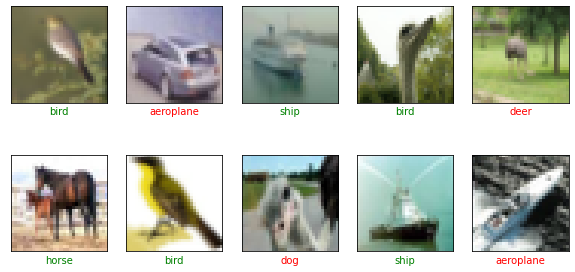

In [17]:
show_random_examples(X_Test,Y_Test,preds)